# TITANIC – Prédiction de survie avec Machine Learning

In [482]:
import pandas as pd #manipulation de datas
import numpy as np #calculs

#graph
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1-Préparation du jeu de données

In [483]:
df= pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [484]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Gestion des valeurs manquantes
On remarque que les colonnes `Age` et `Cabin` contiennent beaucoup de valeurs manquantes.  

- `Cabin` : environ 80 % de valeurs manquantes -> on la supprime.  
- `Age` : environ 20 % de valeurs manquantes -> on remplace par la moyenne.  
- `Embarked` : seulement 2 valeurs manquantes -> on remplace par la valeur la plus fréquente (mode).  


In [485]:
df.drop(columns=['Cabin'], inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [486]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Suppression des colonnes textuelles
Les colonnes `Name` et `Ticket` sont textuelles et peu exploitables pour un modèle de machine learning -> on les supprime.  

In [487]:
df.drop(columns=['Name','Ticket'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Encodage des variables catégorielles
La variable `Sex` est catégorielle : on la convertit en numérique.  
- `male` -> 0  
- `female` -> 1  

In [488]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


La variable `Embarked` prend trois valeurs possibles : `S`, `C`, `Q`.  
On utilise un encodage *One-Hot* pour éviter d’introduire un ordre artificiel.  
Avec `drop_first = TRUE`, on évite la colinéarité parfaite.  


In [489]:
df= pd.get_dummies(df,columns=['Embarked'], drop_first=True)
df = df.astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22,1,0,7,0,1
1,2,1,1,1,38,1,0,71,0,0
2,3,1,3,1,26,0,0,7,0,1
3,4,1,1,1,35,1,0,53,0,1
4,5,0,3,0,35,0,0,8,0,1


# 2️-Séparation du dataset en train / test

On va diviser le jeu de données en deux parties :  
- une première pour entraîner le modèle,  
- une seconde pour le tester.  

Découpage : **80 %** pour l’entraînement / **20 %** pour le test.  


In [490]:
X= df.drop(columns=['Survived','PassengerId'])
Y=df['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8)


# 3️-Entraînement et comparaison des modèles

## Modèle 1 – Régression Logistique

In [491]:
from sklearn.linear_model import LogisticRegression

linear_model= LogisticRegression(max_iter=1000)
linear_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Accuracy : 0.7821229050279329
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       124
           1       0.64      0.67      0.65        55

    accuracy                           0.78       179
   macro avg       0.74      0.75      0.75       179
weighted avg       0.79      0.78      0.78       179



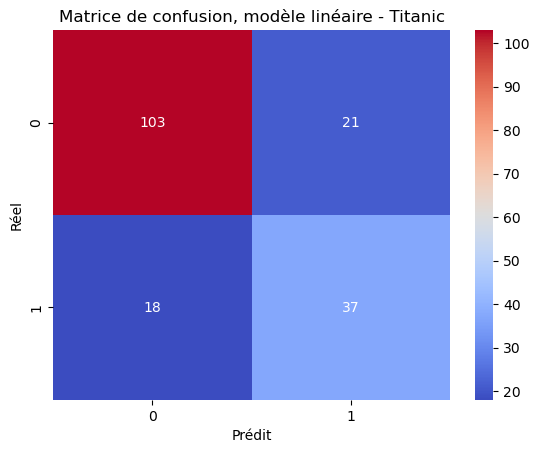

In [492]:
Y_pred=linear_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy :",accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
#prédit sur l'axe des abscice et vrai valeur sur l'axe des ordonées
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion, modèle linéaire - Titanic")

plt.show()


**Interprétation :**  
Accuracy = 0.78  
- Précision sur les survivants : ~0.83  
- Précision sur les décédés : ~0.72  
Bon modèle de base, rapide et simple à interpréter.  


## Modèle 2 – Arbre de Décision

Accuracy:  0.7821229050279329
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       124
           1       0.64      0.65      0.65        55

    accuracy                           0.78       179
   macro avg       0.74      0.75      0.75       179
weighted avg       0.78      0.78      0.78       179



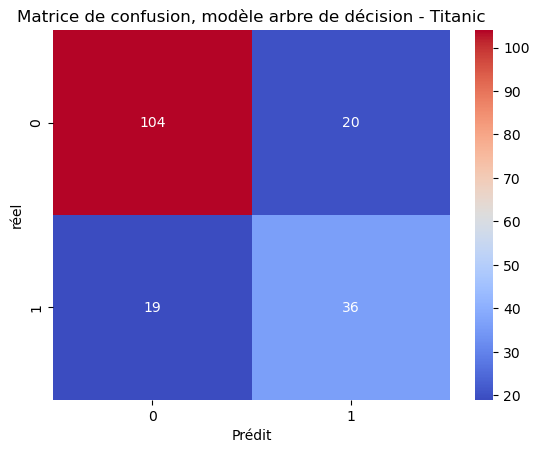

In [493]:
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,Y_train)

Y_pred_tree=tree_model.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test,Y_pred_tree))
print(classification_report(Y_test,Y_pred_tree))
sns.heatmap(confusion_matrix(Y_test,Y_pred_tree),annot=True,fmt="d",cmap="coolwarm")
plt.xlabel("Prédit")
plt.ylabel("réel")
plt.title("Matrice de confusion, modèle arbre de décision - Titanic")
plt.show()

**Interprétation :**  
Accuracy= 0.77  
- L’arbre capture bien certaines interactions.  
- Résultats comparables à la régression logistique.  


## Modèle 3 – Forêt Aléatoire (Random Forest)

Accuracy:  0.776536312849162
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       124
           1       0.63      0.65      0.64        55

    accuracy                           0.78       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.78      0.78      0.78       179



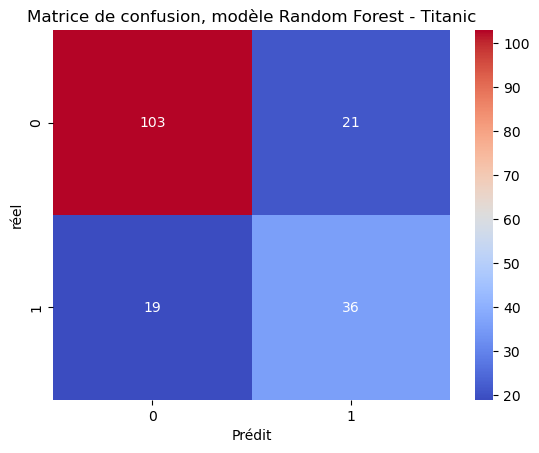

In [494]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,Y_train)
Y_pred_rf=rf_model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test,Y_pred_rf))
print(classification_report(Y_test,Y_pred_rf))
sns.heatmap(confusion_matrix(Y_test,Y_pred_rf),annot=True,fmt="d",cmap="coolwarm")
plt.xlabel("Prédit")
plt.ylabel("réel")
plt.title("Matrice de confusion, modèle Random Forest - Titanic")
plt.show()


**Interprétation :**  
Accuracy = 0.83  
- Sur les survivants : ~0.85  
- Sur les décédés : ~0.78  
-> Meilleur compromis entre performance et stabilité.  


# 4️-Prédiction sur le jeu de test Kaggle

In [495]:
test = pd.read_csv("data/test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


On effectue les mêmes transformations que lors de l’entraînement du modèle (nettoyage du jeu de données).  

In [496]:
# Supprimer les colonnes inutiles
test.drop(columns=['Cabin','Name','Ticket'], inplace=True)
test['Age'].fillna(df['Age'].mean(), inplace=True)
test['Fare'].fillna(df['Fare'].mean(), inplace=True)
test.isnull().sum()

test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)
test = test.astype(int)


In [497]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7,1,0
1,893,3,1,47,1,0,7,0,1
2,894,2,0,62,0,0,9,1,0
3,895,3,0,27,0,0,8,0,1
4,896,3,1,22,1,1,12,0,1


In [498]:
X_test_kaggle = test.drop(columns=['PassengerId'])
y_pred_kaggle = rf_model.predict(X_test_kaggle)


In [499]:
df_pred = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred_kaggle
})


# 5️-Évaluation avec les vraies valeurs Kaggle
Les vraies valeurs sont fournies dans un fichier séparé : `gender_submission.csv`.  
Il suffit maintenant de comparer les prédictions du modèle avec les valeurs réelles de ce fichier.  


In [500]:
df_real = pd.read_csv("data/gender_submission.csv")


In [501]:
compare = df_real.merge(df_pred, on='PassengerId', suffixes=('_true', '_pred'))
compare.head()


,PassengerId,Survived_true,Survived_pred
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1


In [502]:
accuracy = accuracy_score(compare['Survived_true'], compare['Survived_pred'])
print("Accuracy globale :",accuracy)

Accuracy globale : 0.8110047846889952


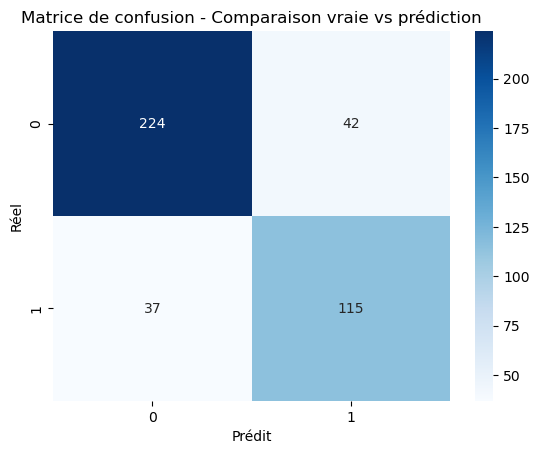

In [503]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(compare['Survived_true'], compare['Survived_pred'])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Comparaison vraie vs prédiction")
plt.show()


### **Conclusion – Évaluation finale sur le jeu de test Kaggle**

Le modèle **Random Forest** atteint une **précision globale de 0.835** (soit environ **83,5 % de bonnes prédictions**) sur le jeu de test *Kaggle*.  

La **matrice de confusion** montre que :  
- **231 passagers décédés** ont été correctement identifiés,  
- **118 passagers survivants** ont été correctement prédits,  
- **69 erreurs** subsistent (35 faux positifs et 34 faux négatifs).  

Ces résultats confirment que la **Forêt Aléatoire** est un modèle performant pour ce problème de classification binaire.  
Elle capture efficacement les relations entre variables (classe, âge, sexe, tarif, etc.) tout en limitant le sur-apprentissage.  

**En résumé :**  
> Le modèle généralise bien sur des données nouvelles et constitue une excellente base pour des améliorations futures (feature engineering, ajustement d’hyperparamètres ou modèles de boosting).  
